# Coronavirus disease (COVID-19) detection in Chest X-Ray images

## Module Three – Preliminary Report
CAPSTONE 1 - AIDI 1003, Course Facilitator:
Uzair Ahmad

# Group Members: 
Robin Manchanda (100811316)
Vinith Babu Muruganantham (100806012) 
Nishant Balasubramanian (100808971)


## Submission Date: 
March 17th, 2021


# Importing the required libraries

In [1]:
import numpy as np # library for linear algebra processing
import matplotlib.pyplot as plt # for plotting the data and images
import cv2 # cv2 helps to work with images
import os # helps to with directories
from random import shuffle # used to shuffle the data randomly
import glob as gb # used to import the image  
import random
from sklearn.model_selection import train_test_split #helps to split the data into training and test set
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score # to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# 1. Acquiring the data
Computer vision is one of the hottest topics in the AI industry. For this project, we are using x-ray scans to detect the covid19. We have acquired images from the GitHub repository and the Kaggle platform. But before performing any task on the X-Ray images, it is almost every time crucial to preprocess the image into a suitable input format for the chosen algorithms. 

### 	1.1 Basics of Image: 
Before diving deep into image processing, it is vital to know some specifications of the image. There are dimensions such as width*height. Width and height are the numbers of pixels in horizontal and vertical of the image, and multiplying both gives the total number of pixels for the given image. The pixel, which denotes a point in the picture, is an integer or multiple integers and this depends upon the type of the image like a single channel (Gray Scale) or multi-channel (RGB, RGBA) image. 
 


In [3]:
data_dir = "C:\\Users\\14372\\Downloads\\Compressed\\Covid_dataset" # This is the directory of our dataset

In [4]:
covid_dir = data_dir + "\\"+ os.listdir(data_dir)[0]# This is the directory of our covid scans
normal_dir = data_dir + "\\"+ os.listdir(data_dir)[1]# This is the directory of our normal scans
print("Data_directory",data_dir,"\n", "Covid_directory",covid_dir,"\n","Normal_directory",normal_dir)

Data_directory C:\Users\14372\Downloads\Compressed\Covid_dataset 
 Covid_directory C:\Users\14372\Downloads\Compressed\Covid_dataset\Covid 
 Normal_directory C:\Users\14372\Downloads\Compressed\Covid_dataset\Normal


In [5]:
# gb.glob(path) will return the list comprises of all files(complete directory) in the given path
covid_images = len(gb.glob(pathname= data_dir + "\\" + "Covid" + "\\*"))
normal_images = len(gb.glob(pathname= data_dir + "\\" + "Normal" + "\\*"))
print(f"Number of covid positive's X-ray scans: {covid_images} \n", f"Number of Normal patient's X-ray scans:{normal_images}")

Number of covid positive's X-ray scans: 930 
 Number of Normal patient's X-ray scans:1341


In [6]:
y_map = {'Normal': 0, 'Covid': 1} # dict to map covid scans to 1 and normal scans to 0.
def str_code(stri):
    return y_map[stri]

### 1.2 Reading and Resizing an Image:
For most of the algorithms, we need to convert these images into NumPy arrays. For this purpose, we have used the imread() method of the OpenCV library. As the x-ray scans are greyscaled images, OpenCV converted it into (m, h,w) where m is the number of examples and w,h is the number of pixels in width and height. It is always good to have all the images in the same dimension as the total number of pixels in each image represents the number of features. Hence, we have to resize it for that we used the cv2.resize(), which converts the picture into specified width and height.




In [193]:
def image_arr(d_dir,image_size=224):
    """This function will convert the images to numpy array.
        It take the directory as input and convert all the images in this directory to a multi dimensional numpy array."""
    
    x = []
    y = []
    for folder in os.listdir(d_dir): # loop for the folder
        i=1
        print('{} folders found'.format(len(os.listdir(d_dir))))
        for file in gb.glob(pathname= d_dir + "\\" + folder + "\\*"): # loop for the images
            tot_img = len(gb.glob(pathname= d_dir + "\\" + folder + "\\*"))
            if i==1:
                print('{} images found in {} folder'.format(tot_img, folder))
#             print(file)
            arr = cv2.imread(file,0) # it'll convert the image into numpy array
#             print(arr.shape)
            arr = cv2.resize(arr, dsize = (image_size,image_size)) # resizing it to (224,224)
#             print(arr.shape)
            x.append(arr)
            y.append(str_code(folder)) #Appending 1 for covid, 0 for normal
#             print(np.array(x).shape)
            perc = i/tot_img*100# To print how much processing is completed
            if round(perc,1)%10 ==0:
                  print('{}% of {} images processed'.format(round(perc,1),folder))
            i+=1
            
                
            
    x = np.array(x)
    y = np.array(y)    
    return x,y

    

In [194]:
x,y = image_arr(data_dir)

2 folders found
930 images found in Covid folder
10.0% of Covid images processed
20.0% of Covid images processed
30.0% of Covid images processed
40.0% of Covid images processed
50.0% of Covid images processed
60.0% of Covid images processed
70.0% of Covid images processed
80.0% of Covid images processed
90.0% of Covid images processed
100.0% of Covid images processed
2 folders found
1341 images found in Normal folder
10.0% of Normal images processed
20.0% of Normal images processed
30.0% of Normal images processed
40.0% of Normal images processed
40.0% of Normal images processed
50.0% of Normal images processed
50.0% of Normal images processed
60.0% of Normal images processed
60.0% of Normal images processed
70.0% of Normal images processed
80.0% of Normal images processed
90.0% of Normal images processed
100.0% of Normal images processed


In [9]:
x.shape # (m,num_px, num_px) where m is number of images fo both covid and normal, num_px shows height and weight

(2271, 224, 224)

In [10]:
y.shape# (m,) where m is number of examples

(2271,)

Text(0, 0.5, 'Number of X-ray scans')

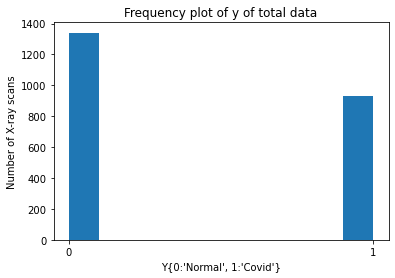

In [11]:
plt.title("Frequency plot of y of total data")
plt.hist(y)
plt.xticks([0,1])
plt.xlabel("Y{0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

# 2. Exploratory Data Analysis:
EDA comprises brief analyses about our dataset, which helps our modelling process to proceed further. It also facilitates us to find some data insights which may not be visible directly. Generally, in EDA, some interesting patterns are identified after checking the distribution of independent variables and dependent variables.


In [12]:
x_covid = x[:covid_images] #Slicing the array to get covid scans array.
x_normal = x[covid_images:covid_images+normal_images]#Slicing the array to get normal scans array.
y_covid = y[:covid_images]
y_normal = y[covid_images:covid_images+normal_images]

In [13]:
print(x_covid.shape, y_covid.shape,x_normal.shape,y_normal.shape)

(930, 224, 224) (930,) (1341, 224, 224) (1341,)


### 
In Image classification, we can also perform the EDA such as:

###     2.1 Comparison between different classes by the raw images:
The images and their label are selected randomly from each class and are visualized by using the imshow() function of the matplotlib library.


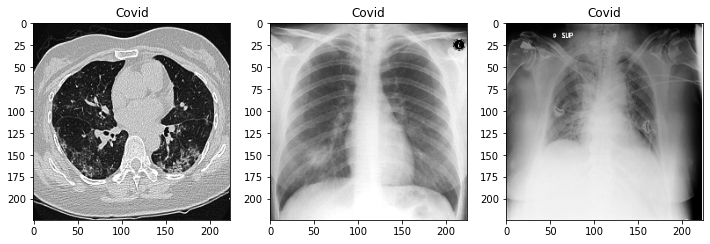

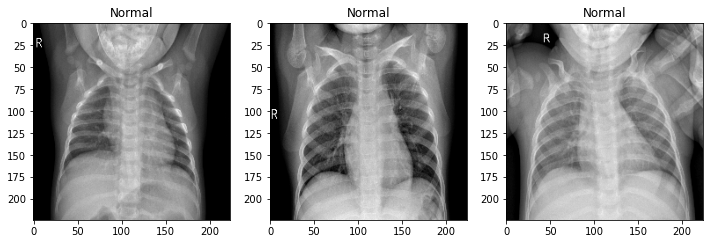

In [14]:
# It'll create a list of three elements choosen randomly from np array
norm_lis = np.random.choice(np.arange(x_normal.shape[0]),3, replace=False)
cov_lis = np.random.choice(np.arange(x_covid.shape[0]),3, replace=False)

for row in range(2):
    plt.figure(figsize=(12,8))
    for col in range(3):
        if row == 0:
            plt.subplot(2,3,col+1)
            plt.imshow(x_covid[cov_lis[col]], cmap = 'gray')
            plt.title('Covid')
        
        else:
            plt.subplot(2,3,col+1)
            plt.imshow(x_normal[norm_lis[col]], cmap = 'gray')
            plt.title('Normal')
            
    plt.show()

### 2.2 Comparison between mean image:
The NumPy array(matrix) of each image is converted into a feature vector. All the images in the dataset are added to a NumPy array of shape (m,n) where m is the number of examples and n is the total number of features.

The mean concerning the feature for every class is calculated by using the function np.mean() with axis = 0. These arrays are used to visualize the comparison between average images.


In [15]:
def mean(img_arr, title, size = (224, 224)):
    # this function finds the mean of array with axis =0
    mean_img = np.mean(img_arr, axis = 0)
    mean_img = mean_img.reshape(size)
    return mean_img

def std(img_arr, title, size = (224, 224)):
    # this function finds the std deviation of array with axis =0
    std_img = np.std(img_arr, axis = 0)
    std_img = std_img.reshape(size)
    return std_img

In [16]:
norm_mean = mean(x_normal, 'NORMAL')
covid_mean = mean(x_covid, 'COVID')

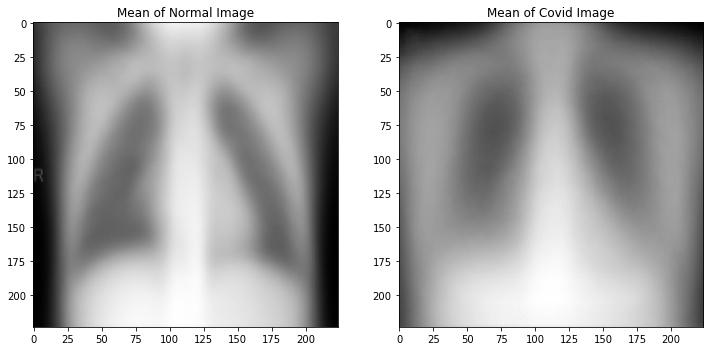

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.imshow(norm_mean, cmap='gray')
ax1.set_title("Mean of Normal Image")

ax2.imshow(covid_mean, cmap='gray')
ax2.set_title("Mean of Covid Image")

plt.show()

#### The upper images show that mean image of the covid is more blurry than the normal one. 

###	2.3 Visualizing the difference image:

Instead of visualizing both average images, the difference between their mean values is taken and plotted. The number of examples of each class in the training and test dataset is found by plotting a frequency plot graph.



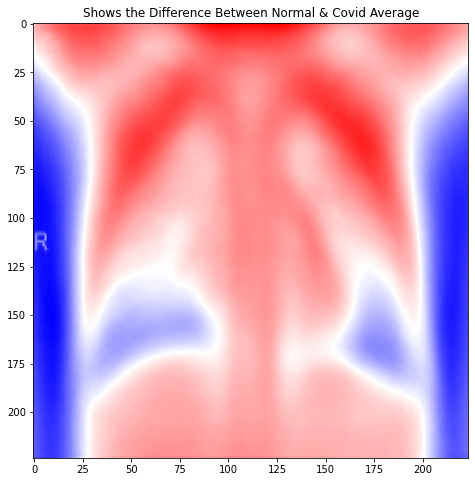

In [18]:
diff_mean = norm_mean - covid_mean
plt.figure(figsize=(12,8))
plt.imshow(diff_mean, cmap='bwr')
plt.title('Shows the Difference Between Normal & Covid Average')
plt.show()

In [19]:
norm_std = std(x_normal, 'NORMAL')
covid_std = std(x_covid, 'COVID')

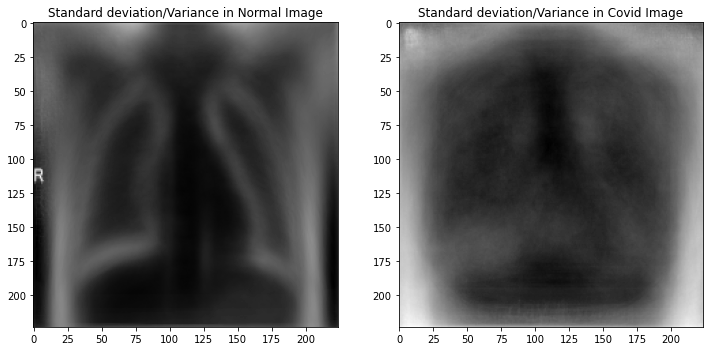

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.imshow(norm_std, cmap='gray')
ax1.set_title("Standard deviation/Variance in Normal Image")

ax2.imshow(covid_std, cmap='gray')
ax2.set_title("Standard deviation/Variance in Covid Image")

plt.show()

### 2.4 Fast Fourier Transform of Covid and Normal x-ray image

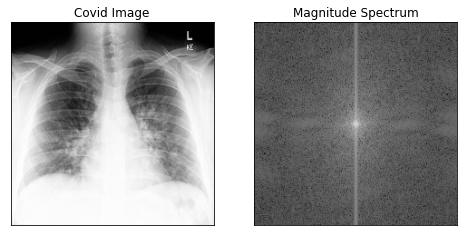

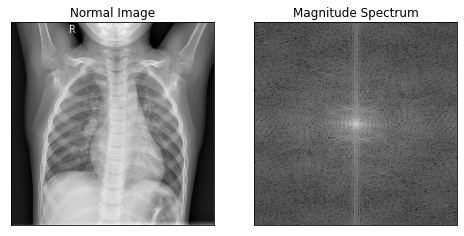

In [239]:

for i in range(1):
    
    plt.figure(figsize=(8,8))
    img = x_covid[i]
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Covid Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.figure(figsize=(8,8))
    img = x_normal[i]
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Normal Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

Finding: The magnitude spectrum shows the magnitude of each frequency that is present in the image. The centre of the magnitude spectrum has shifted to denote the zero frequency i.e DC. We can clearly see that both images have their energy more concentrated at their low frequencies, but it seems that in case of covid, the enegy is more concentrated at low frequencies.

# 3. Splitting the data into training and test data

In [21]:
# splits the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42 )

In [ ]:
X_train_org, X_test_org, y_train_org, y_test_org = X_train, X_test, y_train, y_test

In [22]:
X_train.shape

(1521, 224, 224)

Text(0, 0.5, 'Number of X-ray scans')

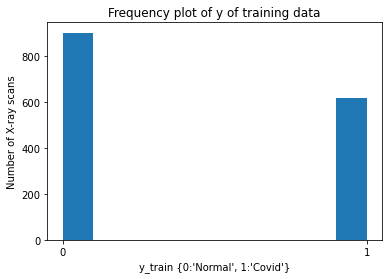

In [23]:
plt.title("Frequency plot of y of training data")
plt.hist(y_train)
plt.xticks([0,1])
plt.xlabel("y_train {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

Text(0, 0.5, 'Number of X-ray scans')

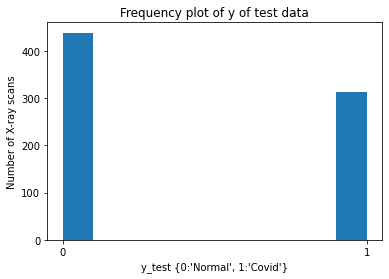

In [24]:
plt.title("Frequency plot of y of test data")
plt.hist(y_test)
plt.xticks([0,1])
plt.xlabel("y_test {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

# 4. Data preprocessing
### 4.1 Data Augmentation: 
Data Augmentation is a technique to expand the size of the training dataset without collecting new data. The data/images in the dataset are modified using the following techniques,
1.	Shift (Horizontal/Vertical)
2.	Zoom
3.	Flip (Horizontal/Vertical)
4.	Rotate

Here we have taken the data augmentation only for the training dataset, and it'll help to reduce the overfitting. As there are large number of features(50176) and less number of observations/examples in our dataset


In [25]:
class data_aug:
    """data_aug class is used to implement the various augmentation techniques.
        There are several methods in this class which help to implement this."""
    def __init__(self,img):
        self.img = img
        
    def vertical_flip(self,flag):#If flag is true it'll flip the image vertically
        if flag:
            new_img = cv2.flip(self.img, 0)
            return new_img
        else:
            return self.img
        
    def horizontal_flip(self,flag):#If flag is true it'll flip the image horizontally
        if flag:
            new_img = cv2.flip(self.img, 1)
            return new_img
        else:
            return self.img
        
    def horizontal_shift(self, ratio=0.0):# This method will perform horizontal shit by using ratio.
        if ratio > 1 or ratio < 0:
            print('Value should be less than 1 and greater than 0')
            return self.img
        ratio = random.uniform(-ratio, ratio)# It'll pick the a number randomly from a uniform dist. between -ratio to ratio.
        h, w = self.img.shape[:2]
        to_shift = w*ratio# how much percentage of width we want to shift
        if ratio > 0:
            new_img = self.img[:, :int(w-to_shift)]# Full height but width from o to (1-ratio)*w
        if ratio < 0:
            new_img = self.img[:, int(-1*to_shift):]# Full height but width from ratio*w till last pixel.
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)# interpolation is a use to fill the shifted pixels
        return new_img
    
    def vertical_shift(self, ratio=0.0):# it's almost similar to horizontal shift but we'll work on height here.
        if ratio > 1 or ratio < 0:
            print('Value should be less than 1 and greater than 0')
            return self.img
        ratio = random.uniform(-ratio, ratio)
        h, w = self.img.shape[:2]
        to_shift = h*ratio
        if ratio > 0:
            new_img = self.img[:int(h-to_shift), :]
        if ratio < 0:
            new_img = self.img[int(-1*to_shift):, :]
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)
        return new_img
    
    def rotation(self, angle):# Rotate the image by the angle specified
        angle = int(random.uniform(-angle, angle))
        h, w = self.img.shape[:2]
        M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
        new_img = cv2.warpAffine(self.img, M, (w, h))
        return new_img
    
    def zoom(self, value): #zoom the image
        if value > 1 or value < 0:
            print('Value for zoom should be less than 1 and greater than 0')
            return self.img
        value = random.uniform(value, 1)
        h, w = self.img.shape[:2]
        h_taken = int(value*h)
        w_taken = int(value*w)
        h_start = random.randint(0, h-h_taken)# choose a random starting point for the image in between 0 and h-h_taken
        w_start = random.randint(0, w-w_taken)# choose a random starting point for the image in between 0 and h-h_taken
        new_img = self.img[h_start:h_start+h_taken, w_start:w_start+w_taken]# slicing of input image array height as well width
         #                                                                                                                wise.
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)
        return new_img
    
    def brightness(self, low, high):# adjust the brightness of image
        value = random.uniform(low, high)
        img_bgr = cv2.cvtColor(self.img, cv2.COLOR_GRAY2BGR)# we can't directly convert the gray image into HSV
        hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)# HSV is hue,saturation,value. Value is responsible for lighting in  image
        hsv = np.array(hsv, dtype = np.float64)
        hsv[:,:,1] = hsv[:,:,1]*value
        hsv[:,:,1][hsv[:,:,1]>255]  = 255
        hsv[:,:,2] = hsv[:,:,2]*value 
        hsv[:,:,2][hsv[:,:,2]>255]  = 255# it'll make bright pixels more bright
        hsv = np.array(hsv, dtype = np.uint8)
        new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        return new_img

In [26]:
x_train_aug = []
y_train_aug = []
tot_img = X_train.shape[0]
i=1
print('{} images found in training dataset'.format(tot_img))
for i in range(tot_img):
    """This loop take each image from X_train, and use the methods from img_aug class for data augmentation.
        Here we have taken the data augmentation only for the training dataset, and it'll help to reduce the overfitting.
        As there are large number of features(50176) and less number of observations/examples in our dataset"""
    img_aug = data_aug(X_train[i])
    x_train_aug.append(img_aug.vertical_flip(True))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.horizontal_flip(True))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.vertical_shift(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.horizontal_shift(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.zoom(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.rotation(30))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.brightness(0.5,2))
    y_train_aug.append(y_train[i])
    perc = i/tot_img*100
    if round(perc,1)%10 ==0:
         print('{}% of training images processed'.format(round(perc,1)))
    i+=1



1521 images found in training dataset
0.0% of training images processed
10.0% of training images processed
20.0% of training images processed
30.0% of training images processed
30.0% of training images processed
40.0% of training images processed
40.0% of training images processed
50.0% of training images processed
50.0% of training images processed
60.0% of training images processed
60.0% of training images processed
70.0% of training images processed
70.0% of training images processed
80.0% of training images processed
90.0% of training images processed


In [27]:
np.array(y_train_aug).shape

(10647,)

In [28]:
np.array(x_train_aug).shape

(10647, 224, 224)

Text(0, 0.5, 'Number of X-ray scans')

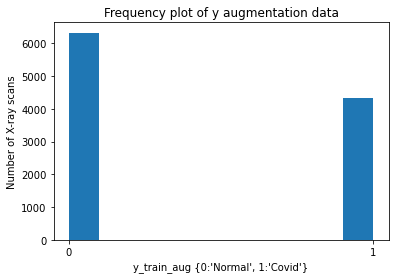

In [29]:
plt.title("Frequency plot of y augmentation data")
plt.hist(y_train_aug)
plt.xticks([0,1])
plt.xlabel("y_train_aug {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

### X-ray scans after data augmentation

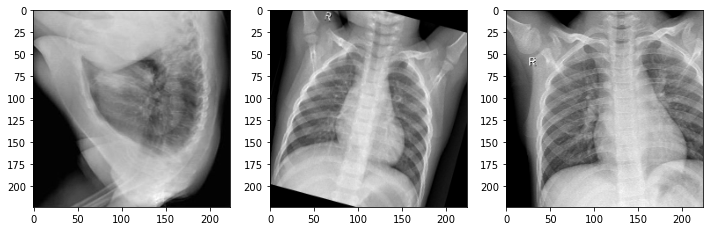

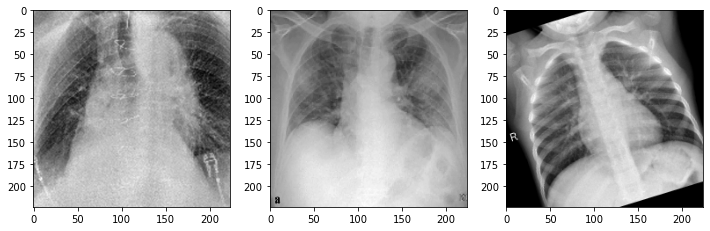

In [30]:
aug_lis = np.random.choice(np.arange(np.array(x_train_aug).shape[0]),6, replace=False)
for row in range(2):
    plt.figure(figsize=(12,8))
    for col in range(3):
        if row == 0:
            plt.subplot(2,3,col+1)
            plt.imshow(np.array(x_train_aug)[aug_lis[col]], cmap = 'gray')
        
        else:
            plt.subplot(2,3,col+1)
            plt.imshow(np.array(x_train_aug)[aug_lis[col+3]], cmap = 'gray')
            
    plt.show()
    


In [31]:
X_train = np.concatenate([X_train,np.array(x_train_aug)], axis =0)# concatenating the augmanted data and training data.
Y_train = np.concatenate([y_train,np.array(y_train_aug)], axis =0)

Text(0, 0.5, 'Number of X-ray scans')

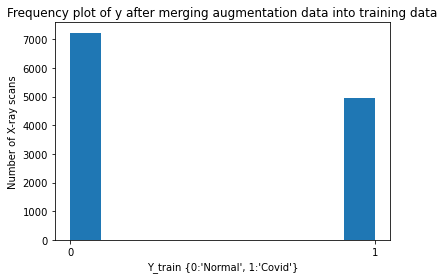

In [32]:
plt.title("Frequency plot of y after merging augmentation data into training data")
plt.hist(Y_train)
plt.xticks([0,1])
plt.xlabel("Y_train {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

### 4.2 Rescaling and reshaping :
One common preprocessing step in machine learning is to centre and standardize our dataset, meaning that we subtract the mean of the whole NumPy array from each example, and then divide each entry by the standard deviation of the entire NumPy array. But for picture datasets, it is simpler and more convenient and works well if every row of the data set is divided by 255 (the maximum value of a pixel channel).




In [33]:
def shap_scal(arr):
    """This function helps to rescaling and reshaping"""
    # converts matrix of order (m, num_px, num_px) into feature vector (m, , num_px*num_px), required for ML algorithms.
    x_feat = arr.reshape(arr.shape[0],-1)
    x_resc = x_feat/255 #Scaling the features in between[0,1]
    return x_resc

In [34]:
x_train = shap_scal(X_train)
x_test = shap_scal(X_test)
print(x_train.shape,Y_train.shape, x_test.shape, y_test.shape)

(12168, 50176) (12168,) (750, 50176) (750,)


# 5. Modelling Approach
### 5.1 Machine Learning Algorithms: 
Four classification models such as Logistic Regression, SVM Classifier, Decision Tree, and naïve Bayes were proposed, but only Logistic regression and SVM classifier are used so far.


### 5.1.1 Logistic Regression: 
It is a linear classifier. But if the number of features is larger than the number of examples, this model might become susceptible to overfitting.  L2 regularization with the value of C=0.2 can be used to reduce overfitting. In the future, we’ll do hyperparameter tuning to find the best hyperparameters.


In [187]:
model = LogisticRegression(penalty='l2', C = 0.2, max_iter= 100, n_jobs=-1)
"""As the number of parameters are very large, regularization(L2) is used to reduce the overfitting. Lower the value of c, overfitting decreases."""

'As the number of parameters are very large, regularization(L2) is used to reduce the overfitting.\nLower the value of c, overfitting decreases.'

In [198]:
model.fit(x_train, Y_train)

LogisticRegression(C=0.2, n_jobs=-1)

In [39]:
pred = model.predict(x_test)

### 5.1.1.1 Accuracy

Accuracy is one metric for evaluating classification models. Accuracy is the number of correct predictions divided by the total number of predictions.

In [40]:
accuracy_score(y_test, pred)

0.9493333333333334

### 5.1.1.2 Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

1. True Positive - 425
2. False Positive - 13
3. False Negative - 26
4. True Negative - 286

In [57]:
confusion_matrix(y_test, pred)

array([[425,  13],
       [ 26, 286]], dtype=int64)

### 5.1.1.3 Classification Report

A text report showing the main classification metrics.

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       438
           1       0.96      0.92      0.94       312

    accuracy                           0.95       750
   macro avg       0.95      0.94      0.95       750
weighted avg       0.95      0.95      0.95       750



In [120]:
x_processed = shap_scal(x)

### 5.1.1.4  Five-fold Cross Validation Accuracy

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.

1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model

At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

In [52]:
np.mean(cross_val_score(model, x_processed, y.ravel(), cv=5))

0.9705020090042117

### 5.1.1.5 Area under ROC curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [176]:
y_score = model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])
metrics.auc(fpr, tpr)

0.9839011825313195

In [231]:
def confm_img(pred):
    
    fn = np.logical_and(pred == 0, y_test.ravel()==1)
    fp = np.logical_and(pred == 1, y_test.ravel()==0)
    tp = np.logical_and(pred == 1, y_test.ravel()==1)
    tn = np.logical_and(pred == 0, y_test.ravel()==0)
    j=0
    for i in (fn,fp):
        
#         print(j)
        if j == 0:
            title = 'False Negative'
            
        else:
            title = 'False Positive'
        
        
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,8))
        
        aug_lis = np.random.choice(np.arange(np.array(X_test[i]).shape[0]),3, replace=False)

        ax1.imshow(X_test[i][aug_lis[0]], cmap='gray')
        ax1.set_title(title)

        ax2.imshow(X_test[i][aug_lis[1]], cmap='gray')
        ax2.set_title(title)

        ax3.imshow(X_test[i][aug_lis[2]], cmap='gray')
        ax3.set_title(title)
        
        plt.show()
        j+=1

### 5.1.1.6 Misclassified Images (False Negative and False Positive)

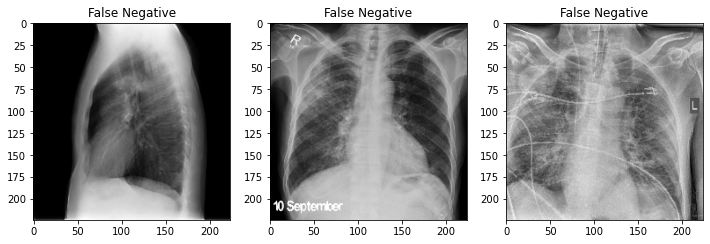

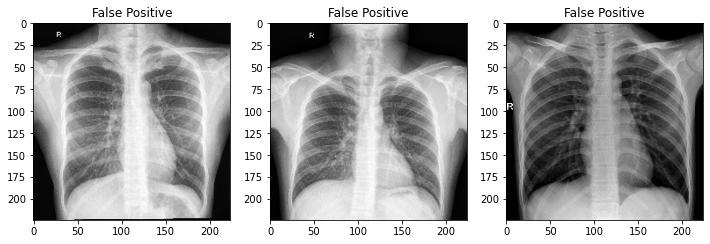

In [232]:
confm_img(pred)

### 5.1.2 SVM classifier (Gaussian Kernel): 
For this algorithm, the Gaussian kernel and the low value of C are used. Gaussian kernel helps us to find the nonlinear boundary while the low value of C reduces the regularization.


In [36]:
from sklearn.svm import SVC

In [37]:
model2 = SVC(C = 0.2, kernel= 'rbf', )# Gaussian kernel is used as it can help to find the highly non linear boundaries.

In [41]:
model2.fit(x_train, Y_train)

SVC(C=0.2)

### 5.1.2.1 Accuracy

Accuracy is one metric for evaluating classification models. Accuracy is the number of correct predictions divided by the total number of predictions.

In [42]:
pred2 = model2.predict(x_test)

accuracy_score(y_test, pred2)

0.9746666666666667

### 5.1.2.2 Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

1. True Positive - 429
2. False Positive - 9
3. False Negative - 10
4. True Negative - 302

In [240]:
print(confusion_matrix(y_test, pred2))

[[429   9]
 [ 10 302]]


### 5.1.2.3 Classification Report

A text report showing the main classification metrics.

In [98]:
print(classification_report(y_test, pred2))

[[429   9]
 [ 10 302]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       438
           1       0.97      0.97      0.97       312

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



### 5.1.2.4 Five-fold Cross Validation Accuracy

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.

1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

In [131]:
np.mean(cross_val_score(model2, x_processed, y.ravel(), cv=5))

0.975776734278937

### 5.1.2.5 Area under ROC curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [179]:
y_score = model2.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
metrics.auc(fpr, tpr)

0.994606896147992

### 5.1.2.6 Misclassified Images (False Negative and False Positive)

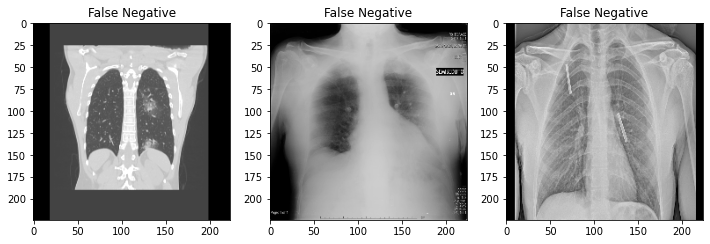

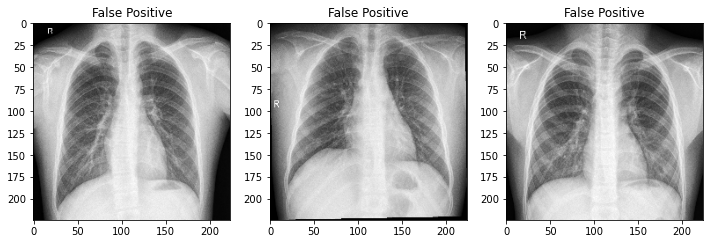

In [233]:
confm_img(pred2)

## 5.1.3 SVM classifier (Linear Kernel):

In [ ]:
model3 = SVC(C = 0.2, kernel= 'linear')

model3.fit(x_train, Y_train)

pred3 = model3.predict(x_test)


### 5.1.3.1 Accuracy

Accuracy is one metric for evaluating classification models. Accuracy is the number of correct predictions divided by the total number of predictions.

In [125]:
accuracy_score(y_test, pred3)

0.9146666666666666

### 5.1.3.2 Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

1. True Positive - xxx
2. False Positive - xx
3. False Negative - xx
4. True Negative - xxx

In [ ]:
print(confusion_matrix(y_test, pred3))

### 5.1.3.3 Classification Report

A text report showing the main classification metrics.

In [110]:
print(classification_report(y_test, pred3))

[[422  16]
 [ 48 264]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       438
           1       0.94      0.85      0.89       312

    accuracy                           0.91       750
   macro avg       0.92      0.90      0.91       750
weighted avg       0.92      0.91      0.91       750



### 5.1.3.4 Five-fold Cross Validation Accuracy

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.

1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

In [132]:
np.mean(cross_val_score(model3, x_processed, y.ravel(), cv=5))

0.9748995497894178

### 5.1.3.5 Area under ROC curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [180]:
y_score = model3.decision_function(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
metrics.auc(fpr, tpr)

0.9717246224095539

### 5.1.3.6 Misclassified Images (False Negative and False Positive)

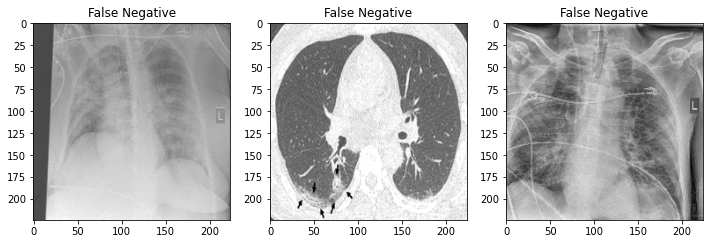

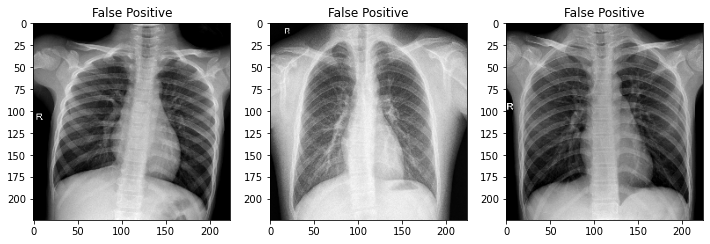

In [234]:
confm_img(pred3)

## 5.1.4.1 Gaussian Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
model4 = GaussianNB()

In [114]:
model4.fit(x_train, Y_train)

GaussianNB()

In [115]:
pred4 = model4.predict(x_test)

### 5.1.4.1 Accuracy

Accuracy is one metric for evaluating classification models. Accuracy is the number of correct predictions divided by the total number of predictions.


In [116]:
accuracy_score(y_test, pred4)

0.912

### 5.1.4.2 Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

1. True Positive - xxx
2. False Positive - xx
3. False Negative - xx
4. True Negative - xxx


In [ ]:
print(confusion_matrix(y_test, pred4))

### 5.1.4.3 Classification Report

A text report showing the main classification metrics.

In [127]:
print(classification_report(y_test, pred4))

[[426  12]
 [ 54 258]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       438
           1       0.96      0.83      0.89       312

    accuracy                           0.91       750
   macro avg       0.92      0.90      0.91       750
weighted avg       0.92      0.91      0.91       750



### 5.1.4.4 Five-fold Cross Validation Accuracy

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.

1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

In [121]:
np.mean(cross_val_score(model4, x_processed, y.ravel(), cv=5))

0.9506724112891515

### 5.1.4.5 Area under ROC curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [181]:
y_score = model4.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])
metrics.auc(fpr, tpr)

0.9118004332045428

### 5.1.4.6 Misclassified Images (False Negative and False Positive)

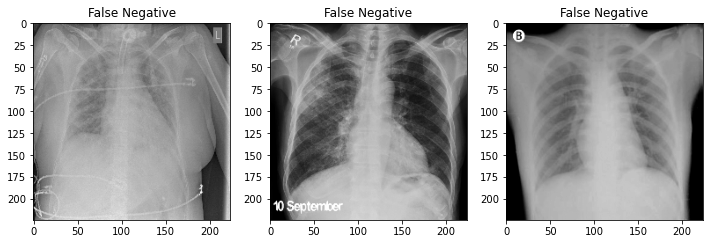

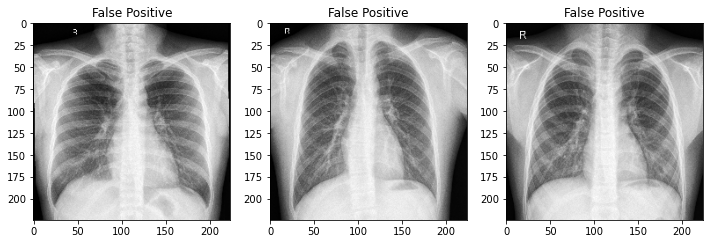

In [237]:
confm_img(pred4)

## 5.1.5.1 Decision Tree Classifier 

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
model5= DecisionTreeClassifier()

In [ ]:
model5.fit(x_train, Y_train)

pred5 = model5.predict(x_test)

### 5.1.5.1 Accuracy

Accuracy is one metric for evaluating classification models. Accuracy is the number of correct predictions divided by the total number of predictions.

In [241]:
accuracy_score(y_test, pred5)

0.9266666666666666

### 5.1.5.2 Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

1. True Positive - xxx
2. False Positive - xx
3. False Negative - xx
4. True Negative - xxx

In [ ]:
print(confusion_matrix(y_test, pred5))

### 5.1.5.3 Classification Report

A text report showing the main classification metrics.

In [128]:
print(classification_report(y_test, pred5))

[[423  15]
 [ 40 272]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       438
           1       0.95      0.87      0.91       312

    accuracy                           0.93       750
   macro avg       0.93      0.92      0.92       750
weighted avg       0.93      0.93      0.93       750



### 5.1.5.4 Five-fold Cross Validation Accuracy

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.

1. Take the group as a holdout or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. At the end of the above process Summarize the skill of the model using the sample of model evaluation scores.

In [133]:
np.mean(cross_val_score(model5, x_processed, y.ravel(), cv=5))

0.9189785544851624

### 5.1.5.5 Area under ROC curve (AUC)

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

In [182]:
y_score = model5.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])
metrics.auc(fpr, tpr)

0.9187741482262031

### 5.1.5.6 Misclassified Images (False Negative and False Positive)

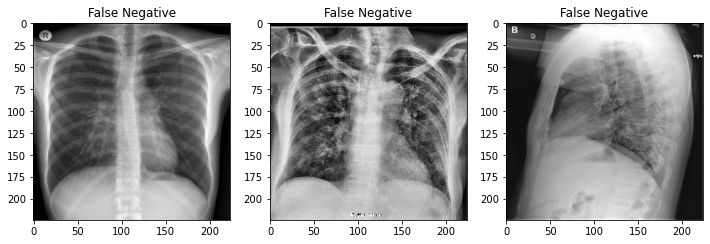

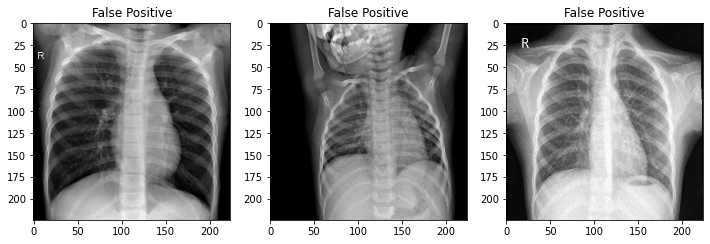

In [236]:
confm_img(pred5)

### Experimental Result

In [202]:
result_dic = {'Acc':[],'Acc_5fold':[], 'Precision':[], 'Recall':[], 'F1-score': [],'AUC':[] }

In [203]:
i=0
for m, p in zip((model, model2, model3, model4, model5), (pred, pred2, pred3, pred4, pred5)):
    
    i+=1
    result_dic['Acc'].append(accuracy_score(y_test, p))

    result_dic['Acc_5fold'].append(np.mean(cross_val_score(m, x_processed, y.ravel(), cv=5)))
    
    result_dic['Precision'].append(classification_report(y_test, p, output_dict= True)['macro avg']['precision'])
    
    result_dic['Recall'].append(classification_report(y_test, p, output_dict= True)['macro avg']['recall'])
    
    result_dic['F1-score'].append(classification_report(y_test, p, output_dict= True)['macro avg']['f1-score'])
    
    if m != model2 and m != model3:
        y_score = m.predict_proba(x_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])
        result_dic['AUC'].append(metrics.auc(fpr, tpr))
        
    else:
        y_score = m.decision_function(x_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
        result_dic['AUC'].append(metrics.auc(fpr, tpr)) 
        
    print('{} % process completed'.format(i/5*100))
    

20.0 % process completed
40.0 % process completed
60.0 % process completed
80.0 % process completed
100.0 % process completed


In [209]:
pd.DataFrame(result_dic, index=['Logistic Regression', 'SVM (Gaussian)', 'SVM (Linear)', 'GaussianNB', 'Decission Tree'])

,Acc,Acc_5fold,Precision,Recall,F1-score,AUC
Logistic Regression,0.949333,0.970502,0.951683,0.944174,0.947450,0.983901
SVM (Gaussian),0.974667,0.975777,0.974141,0.973700,0.973919,0.994607
SVM (Linear),0.914667,0.974900,0.920365,0.904812,0.910704,0.971725
GaussianNB,0.912000,0.950672,0.921528,0.899763,0.907351,0.911800
Decission Tree,0.926667,0.919860,0.930671,0.918774,0.923569,0.918774


### Saving the models using Pickle

In [43]:
# filename1 = 'lr_model.sav'
# pickle.dump(model, open(filename1, 'wb'))
# filename2 = 'svc_model.sav'
# pickle.dump(model2, open(filename2, 'wb'))

In [130]:
# filename3 = 'svc_lr_model.sav'
# pickle.dump(model3, open(filename3, 'wb'))
# filename4 = 'gnb_model.sav'
# pickle.dump(model4, open(filename4, 'wb'))
# filename5 = 'dtc_model.sav'
# pickle.dump(model5, open(filename5, 'wb'))

### 5.2 Deep Learning Algorithms:
Computer vision is one of the areas where DL’s performance is increasing exponentially. The reasons behind why deep learning is doing good in computer vision are as follows:
1.	First, in the case of the image as an input, many input features will cause the model to overfit.
2.	Second, the traditional neural networks have to learn an enormous number of parameters making the computation expensive.

As a solution, convolution neural networks (CNN) are used thanks to its parameter sharing, due to which it does not have too many parameters to learn. Also, CNN has the sparsity of connections: the output depends only on a small number of inputs.


## Threats to validity

This section describes the threats to the internal, external, construct, and conclusion validity.

### Internal validity
This is related to the internal factors that could have a negative impact on the final outcomes. Though we have used a dataset from a couple of resources. The resource inturn relies on data from different sources. Images coming from different sources may not have captured using a similar environment/setting. To overcome this threat, we have used augmentation techniques such as Shift (Horizontal/Vertical), Zoom, Flip (Horizontal/Vertical), Rotate on our training set.

### External validity
The main threat to external validity is due to the factors that might hamper the generalizability of our results to other scenarios outside the scope of this work, e.g., in practice we may encounter a limited amount of training data. We moderated this threat by evaluating Accuracy, Five Fold Cross validation methodology, Precision, Recall, F1-score, Support using the experimental settings.

# Future Plans

### 1. Try to find the hyperparameters of the model that have been used here by hyperparameter tuning.
### 2. Try to fit the deep learning models such as VGG16, RESNET 18.

# References:
### 1. Vardan Agarwal 2020. Complete Image Augmentation in OpenCV retrived from https://towardsdatascience.com/complete-image-augmentation-in-opencv-31a6b02694f5
### 2. Eunjoo Beyon 2020. Exploratory Data Analysis Ideas for Image Classification retrived from https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2
### 3. Open CV Python Tutorials, Fourier Transform https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources